## 0.Import

In [ ]:
# ================================================================
# Complete reproduction of the paper: "Wine feature importance and quality prediction:
# A comparative study of machine learning algorithms with unbalanced data"
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Complete Implementation of the Paper: 'Wine feature importance and quality prediction'")
print("=" * 80)

Complete Implementation of the Paper: 'Wine feature importance and quality prediction'


## 1.Data Loading

In [ ]:
# Step 1: Data Loading
print("\n1. Loading data...")

def load_wine_data(file_path):
    """
    Load wine quality data with proper handling of semicolon or comma separation
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()

    if ';' in first_line:
        return pd.read_csv(file_path, sep=';')
    else:
        return pd.read_csv(file_path)

try:
    red_wine = load_wine_data('wine+quality/winequality-red.csv')
    print(f"Red wine dataset loaded: {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")
except Exception as e:
    print(f"Error loading red wine dataset: {e}")
    exit(1)


print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


1. Loading data...
Red wine dataset loaded: 1599 rows and 12 columns
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

  

## 2.Data preprocessing (based on section 3.2 of the paper)

In [ ]:
# Remove duplicates
initial_rows = red_wine.shape[0]
red_wine = red_wine.drop_duplicates()
removed_duplicates = initial_rows - red_wine.shape[0]
print(f"  Removed {removed_duplicates} duplicate entries")

# Remove missing values
missing_values = red_wine.isnull().sum().sum()
red_wine = red_wine.dropna()
print(f"  Processed {missing_values} missing values")

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


  Removed 240 duplicate entries
  Processed 0 missing values
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol 

## 3.Feature selection (excluding residual sugar as per the paper)

In [ ]:
# Step 3: Feature selection (excluding residual sugar as per the paper)
print("\n3. Feature selection...")
correlation_matrix = red_wine.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation with quality:")
print(quality_correlation)


# Select all features except residual sugar (as per the paper)
selected_features = [col for col in red_wine.columns if col != 'residual sugar' and col != 'quality']
print("\nSelected features:")
print(selected_features)



3. Feature selection...
Correlation with quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

Selected features:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Step 4: Quality categorization (based on section 3.2 of the paper)

Wine category distribution:
quality_category
0      63
1    1112
2     184
Name: count, dtype: int64


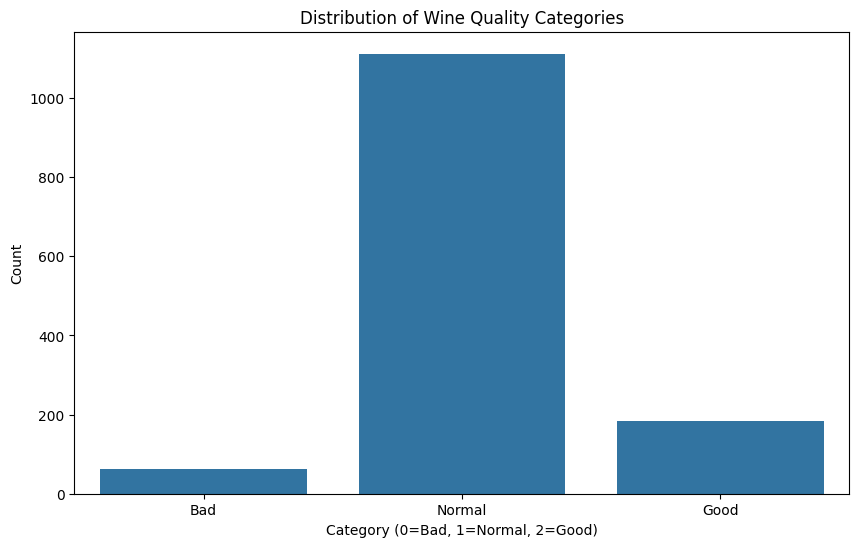

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_category  
0      9.4        5             

In [ ]:
def encode_quality(quality):
    """
    Encode wine quality into categories as specified in the paper:
    - Bad wine: quality < 5
    - Normal wine: 5 <= quality <= 6
    - Good wine: 7 <= quality <= 10
    """
    if quality < 5:
        return 0  # Bad wine
    elif 5 <= quality <= 6:
        return 1  # Normal wine
    else:  # quality >= 7
        return 2  # Good wine

red_wine['quality_category'] = red_wine['quality'].apply(encode_quality)

# Check distribution after encoding
category_counts = red_wine['quality_category'].value_counts().sort_index()
print("Wine category distribution:")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_category', data=red_wine)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Category (0=Bad, 1=Normal, 2=Good)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Bad', 'Normal', 'Good'])
plt.show('wine_quality_categories.png')
plt.close()

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


## Step 5: Data standardization & Step 6: Train-test split

In [ ]:
# Checking excluding column(residual sugar)
print("\nColumn name:")
print(red_wine[selected_features].columns.tolist())


# Step 5: Data standardization
X = red_wine[selected_features]
y = red_wine['quality_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Step 6: Train-test split
print("\n6. Train-test split...")
# ==============================================================
# ==================YOU CAN USE THIS TEST MODEL==================
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"  Training data: {X_train.shape[0]} samples")
print(f"  Test data: {X_test.shape[0]} samples")




Column name:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

6. Train-test split...
  Training data: 1087 samples
  Test data: 272 samples


## Step 7: Apply SMOTE (key contribution of the paper)


7. Handling imbalanced data with SMOTE...
  Class distribution before SMOTE:
quality_category
0     50
1    890
2    147
Name: count, dtype: int64
  Class distribution after SMOTE:
quality_category
0    890
1    890
2    890
Name: count, dtype: int64
  Original training data: 1087 samples
  Training data after SMOTE: 2670 samples


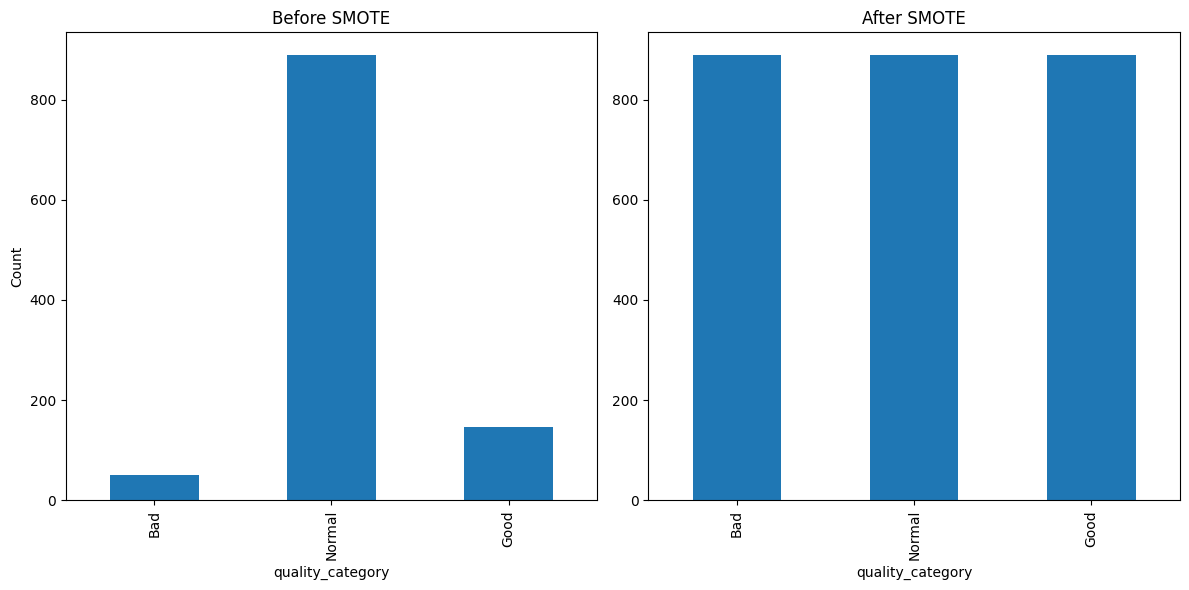

In [ ]:
# Step 7: Apply SMOTE (key contribution of the paper)
print("\n7. Handling imbalanced data with SMOTE...")
print("  Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())


smote = SMOTE(random_state=42)
# ==============================================================
# ==================YOU CAN USE THIS TRAIN MODEL==================
# ==============================================================
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("  Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

print(f"  Original training data: {X_train.shape[0]} samples")
print(f"  Training data after SMOTE: {X_train_balanced.shape[0]} samples")

# Visualize class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pd.Series(y_train).value_counts().sort_index().plot(
    kind='bar', ax=ax[0], title='Before SMOTE'
)
ax[0].set_xticklabels(['Bad', 'Normal', 'Good'])
ax[0].set_ylabel('Count')

pd.Series(y_train_balanced).value_counts().sort_index().plot(
    kind='bar', ax=ax[1], title='After SMOTE'
)
ax[1].set_xticklabels(['Bad', 'Normal', 'Good'])
plt.tight_layout()
plt.show('smote_comparison.png')
plt.close()

# SVM

In [ ]:
#Implement SVM learnig to unbalanced data
svc = SVC() #Model building
svc.fit(X_train, y_train) #Model Training
Y_svc_pred = svc.predict(X_test)
print(f"{classification_report(y_test, Y_svc_pred)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.99      0.91       222
           2       0.83      0.27      0.41        37

    accuracy                           0.85       272
   macro avg       0.56      0.42      0.44       272
weighted avg       0.80      0.85      0.80       272



In [ ]:
#Implement gridserach to balanced data to find the best parameters for the SVM model
param = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient (RBF only)
    'kernel': ['rbf', 'linear']    # Try different kernels
}
grid = GridSearchCV(SVC(),param_grid=param,cv=5,scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#Implementation SVM learning on blanced data with optimized parameters
svc = SVC(C=10,gamma=1,kernel= "rbf" ) #Model building
svc.fit(X_train_balanced, y_train_balanced) #Model Training
Y_svc_pred_balanced = svc.predict(X_test)
results_diff = pd.DataFrame({'Actual': y_test, 'Predicted': Y_svc_pred_balanced})
results_diff
print(f'Accuracy score for SVM classifier: {accuracy_score(y_test, Y_svc_pred_balanced)}')
print(f"classification report:{classification_report(y_test, Y_svc_pred_balanced)}")

Accuracy score for SVM classifier: 0.8014705882352942
classification report:              precision    recall  f1-score   support

           0       0.17      0.15      0.16        13
           1       0.86      0.91      0.88       222
           2       0.58      0.41      0.48        37

    accuracy                           0.80       272
   macro avg       0.53      0.49      0.51       272
weighted avg       0.79      0.80      0.79       272



# Modeling improvement

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_scaled_1 = scaler_std.fit_transform(X_train_1)
X_test_scaled_1 = scaler_std.transform(X_test_1)

In [ ]:
svc = SVC() #Model building
svc.fit(X_train_scaled_1, Y_train_1) #Model Training
Y_svc_pred_1 = svc.predict(X_test_scaled_1)
print(f"classification report:{classification_report(Y_test_1, Y_svc_pred_1)}")

classification report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.87      0.99      0.92       223
           2       0.84      0.47      0.60        34

    accuracy                           0.87       272
   macro avg       0.57      0.49      0.51       272
weighted avg       0.82      0.87      0.83       272



In [ ]:
y.value_counts()

,count
quality_category,
1,1112
2,184
0,63


In [ ]:
#Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_s, Y_s = smote.fit_resample(X, y)
Y_s.value_counts()

,count
quality_category,
1,1112
2,1112
0,1112


In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_s, Y_s, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_scaled_2 = scaler_std.fit_transform(X_train_2)
X_test_scaled_2 = scaler_std.transform(X_test_2)

In [ ]:
#Implement gridserach to unbalanced data to find the best parameters for the SVM model
param = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient (RBF only)
    'kernel': ['rbf', 'linear']    # Try different kernels
}
grid = GridSearchCV(SVC(),param_grid=param,cv=5,scoring='accuracy')
grid.fit(X_train_scaled_2, Y_train_2)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#Implementation SVM learning on blanced data with optimized parameters
svc = SVC(C=10,gamma=1,kernel= "rbf" ) #Model building
svc.fit(X_train_scaled_2, Y_train_2) #Model Training
Y_svc_pred_balanced_2 = svc.predict(X_test_scaled_2)
results_diff = pd.DataFrame({'Actual': Y_test_2, 'Predicted': Y_svc_pred_balanced_2})
results_diff
print(f"classification report:{classification_report(Y_test_2, Y_svc_pred_balanced_2)}")

classification report:              precision    recall  f1-score   support

           0       0.96      0.95      0.96       222
           1       0.91      0.90      0.91       240
           2       0.93      0.95      0.94       206

    accuracy                           0.93       668
   macro avg       0.93      0.93      0.93       668
weighted avg       0.93      0.93      0.93       668

